<a href="https://colab.research.google.com/github/c-susan/datasci_6_regression/blob/main/datasci_6_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Packages

In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Loading Dataset

> This dataset was taken from UC Irvine Machine Learning Repository. The dataset contains information on rice of the Cammeo and Osmancik species and their measurements.



In [15]:
# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

# metadata
print(rice_cammeo_and_osmancik.metadata)

# variable information
print(rice_cammeo_and_osmancik.variables)


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent System

In [16]:
df = pd.DataFrame(X)
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064


**______________________________________________________________________________________________________________**

# **1. Simple Linear Regression**

> **Regression Model**

In [17]:
X = sm.add_constant(df['Perimeter'])  # Adds a constant term to the predictor
model = sm.OLS(df['Eccentricity'], X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Eccentricity   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     1606.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          2.89e-293
Time:                        01:07:13   Log-Likelihood:                 10017.
No. Observations:                3810   AIC:                        -2.003e+04
Df Residuals:                    3808   BIC:                        -2.002e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7422      0.004    204.944      0.0

### Checking Assumptions

> **Assessing Linearity of the Relationship**

In [18]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.9555823874227901, p-value=0.8391812205240818


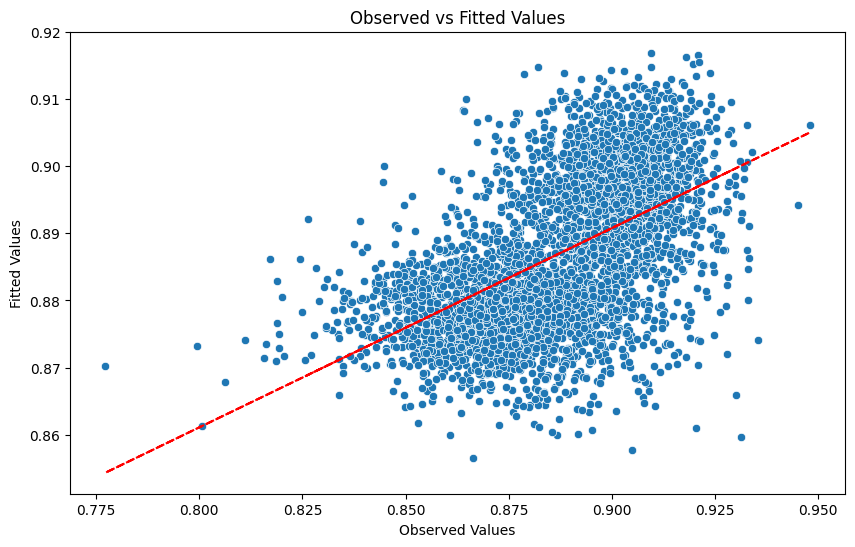

In [19]:
## Graphing the observed (actual) values vs fitted (estimated from regression model) values
residuals = results.resid
fitted = results.fittedvalues

# Calculating the best fit line
best_fit_line = np.polyfit(df['Eccentricity'], fitted, 1)
y_fit = np.poly1d(best_fit_line)(df['Eccentricity'])

# Plotting observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Eccentricity'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot(df['Eccentricity'], y_fit, color='red', linestyle='--')

plt.show()

> **Assessing Normality of Residuals**

In [20]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9935926795005798, p-value=5.529977951251874e-12


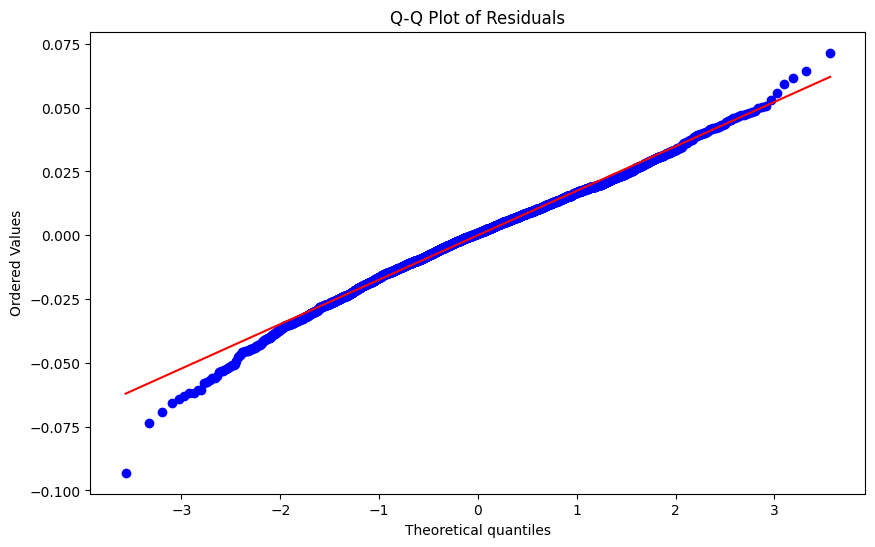

In [21]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

> **Assessing the Homogeneity of Variance of Residuals**

In [22]:
##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.5920799701403396, p-value=2.8518080572519574e-24


### **Summary**
**X** (independent variable): Perimeter = measures the circumference of the rice grain

**Y** (dependent variable): Eccentricity = measures the eclipse of the rice grain

**Regression Model: OLS Regression Results**
+ In the results of the regression model, the R-squared was 0.297. This indicates that 29.7% of the variance in eccentricity/eclipse can be explained by the perimeter length.
+ The Perimeter variable has a coefficient of 0.0003. This means that for a 1 unit change in Perimeter length, there is a 0.0003 change in Eccentricity. In addition, the p-value of Perimeter is 0.000 is less than the significance level of 0.05. This means that Perimeter is statistically significant and has an effect on Eccentricity.

**Linearity of the Relationship**
+ The rainbow test is used to assess the linearity of the relationship between the two variables: Perimeter and Eccentricity. It gave a p-value of ~0.839. This is more than the signicance level of 0.05 and indicates that the relationship between the variables is linear.

**Assessing Normality of Residuals**
+ The Shapiro-Wilk test used to test the normality of the residuals gave a p-value of 5.529977951251874e-12, which means that the residuals are statistically significant.

**Assessing the Homogeneity of Variance of Residuals**
+ The Goldfeld-Quandt test to assess the homogeneity of variance of the residuals gave a p-value of 2.8518080572519574e-24, which means that the homogeneity of variance of the residuals is unequal and indicates heteroscedasticity, meaning the variance of the
residuals is not constant across different levels of the independent variable.

**______________________________________________________________________________________________________________**

# **2. Multiple Linear Regression**

> **Regression Model**

In [23]:
X = df[['Area','Perimeter']]
X = sm.add_constant(X)

model = sm.OLS(df['Eccentricity'], X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Eccentricity   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     5923.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:07:30   Log-Likelihood:                 12040.
No. Observations:                3810   AIC:                        -2.407e+04
Df Residuals:                    3807   BIC:                        -2.405e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4662      0.004    119.915      0.0

### Checking Assumptions

> **Checking Multicollinearity**

In [24]:
# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
    Variable         VIF
0      const  545.999761
1       Area   15.158752
2  Perimeter   15.158752


> **Assessing Linearity of the Relationship**

In [25]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.9933165959961322, p-value=0.5581489064439045


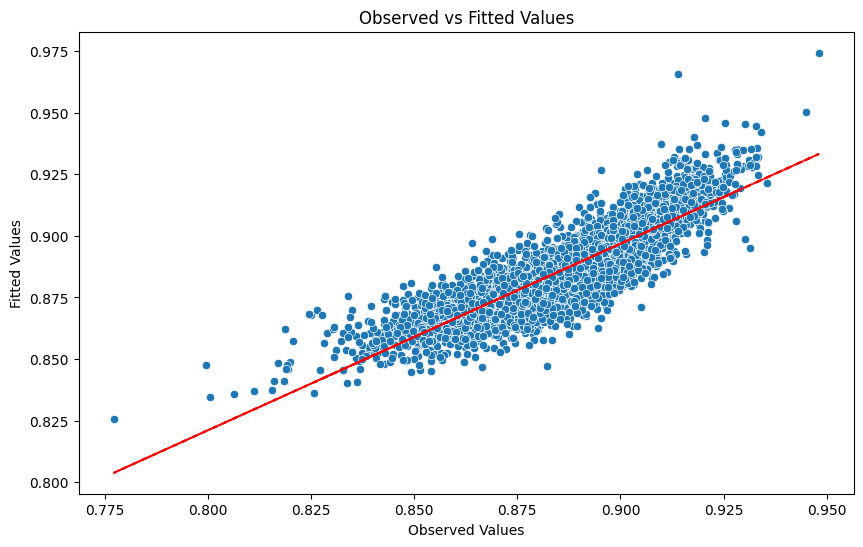

In [26]:
residuals = results.resid
fitted = results.fittedvalues

# Calculating the best fit line
best_fit_line = np.polyfit(df['Eccentricity'], fitted, 1)
y_fit = np.poly1d(best_fit_line)(df['Eccentricity'])

# Plotting observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Eccentricity'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot(df['Eccentricity'], y_fit, color='red', linestyle='--')

plt.show()


> **Assessing Normality of Residuals**

Shapiro-Wilk Test: W=0.9886882305145264, p-value=6.668628189751043e-17


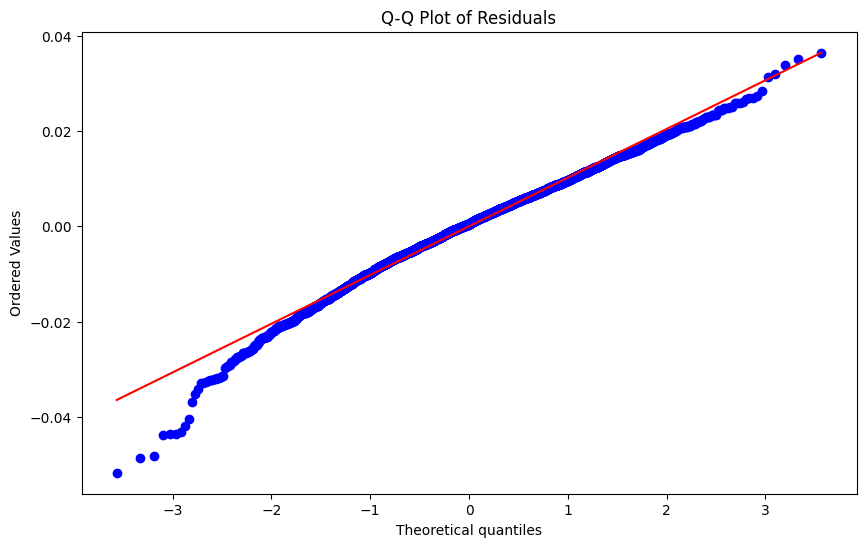

In [27]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

> **Assessing the Homogeneity of Variance of Residuals**

In [28]:
##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.9080295181565612, p-value=1.245071062581074e-44


### **Summary**

**Regression Model: OLS Regression Results**
* In the results of the regression model, the R-squared was 0.757. This indicates that 75.7% of the variance in eccentricity/eclipse can be explained by the perimeter and area.
* The Perimeter variable has a coefficient of 0.0018. This means that for a 1 unit increase in Perimeter, there is a 0.0003 increase in Eccentricity.
* The Area variable has a coefficient of -3.174e-05. This means that for a 1 unit increase in Area, there is a -3.174e-05 decrease in Eccentricity.
* The p-value of Perimeter and Area are both 0.000, which are less than the significance level of 0.05. This means that the Perimeter and Area variables are statistically significant and has an effect on Eccentricity.

**Checking Multicollinearity**
+ Multicollinearity checks if one or more variables used in the model are strognly correlated to each other. In this case, it returned a value of 15.158752 for both the Area and Perimeter. Since the values are greater than 10, this means that the variables are highly correlated.

**Linearity of the Relationship**
* The rainbow test used to assess the linearity of the relationship between the variables gave a p-value of 0.5581489064439045. This is more than the signicance level of 0.05 and indicates that the relationship between the variables is linear.

**Assessing Normality of Residuals**
* The Shapiro-Wilk test used to test the normality of the residuals gave a p-value of 6.668628189751043e-17, which means that the residuals are statistically significant.

**Assessing the Homogeneity of Variance of Residuals**
* The Goldfeld-Quandt test to assess the homogeneity of variance of the residuals gave a p-value of 1.245071062581074e-44, which means that the homogeneity of variance of the residuals is unequal. It also indicates heteroscedasticity, which mean that the variance of the
residuals is not constant across different levels of the independent variables.


**______________________________________________________________________________________________________________**